<a href="https://colab.research.google.com/github/AhmedElrefaey98/KPMJ/blob/main/Data_Quality_KPMJ_TheForage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Quality KPMJ TheForage
This is task one


---




Press end to see the report "Conclusion"









In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [6]:
from google.colab import drive
drive.mount('/forage')

Drive already mounted at /forage; to attempt to forcibly remount, call drive.mount("/forage", force_remount=True).


In [7]:
customerAddress=pd.read_excel(open('/forage/MyDrive/forage/KPMG_VI_New_raw_data_update_final (1).xlsx', 'rb'),
              sheet_name='CustomerAddress' ,header=1)  

In [8]:
customerDemographic=pd.read_excel(open('/forage/MyDrive/forage/KPMG_VI_New_raw_data_update_final (1).xlsx', 'rb'),
              sheet_name='CustomerDemographic' ,header=0)  

In [9]:
newCustomerList=pd.read_excel(open('/forage/MyDrive/forage/KPMG_VI_New_raw_data_update_final (1).xlsx', 'rb'),
              sheet_name='NewCustomerList' ,header=1)  

In [10]:
transactions=pd.read_excel(open('/forage/MyDrive/forage/KPMG_VI_New_raw_data_update_final (1).xlsx', 'rb'),
              sheet_name='Transactions' ,header=1)  

# Data Quality 


1- cuscustomerAddress 

In [11]:

print(customerAddress.head(3))
customerAddress.replace(to_replace="null!",value=np.nan,inplace=True)
# Checking types and completeness 
customerAddress.info()

   customer_id              address  ...    country property_valuation
0            1   060 Morning Avenue  ...  Australia                 10
1            2  6 Meadow Vale Court  ...  Australia                 10
2            4   0 Holy Cross Court  ...  Australia                  9

[3 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [12]:
# No null values or faults in the data types
# checke consistency and currency
print(customerAddress.property_valuation.value_counts(ascending=True,sort=True))
# no faults
# checking duplicates


customerAddress.drop_duplicates(subset='customer_id', keep='first')


# Every thing is fine for the quality of this sheet

2     143
1     154
3     186
12    195
4     214
5     225
6     238
11    281
7     493
10    577
8     646
9     647
Name: property_valuation, dtype: int64


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [13]:
customerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


2- customerDemographic

In [14]:
print(customerDemographic.head(3))
customerDemographic.replace(to_replace="null!",value=np.nan,inplace=True)
# Checking types and completeness 
customerDemographic.info()
# there's null values in the job_industry_category and DOB and tenure ,last name ,job title
# gender should be categorical not object 
# gender contains different calls for the same word like F for Female
# DOB should be datetime not object

   customer_id      first_name  last_name  ... deceased_indicator  owns_car tenure
0            1         Laraine  Medendorp  ...                  N       Yes     11
1           54         Loralyn     Wonfor  ...                  N       Yes     18
2            5  Sheila-kathryn     Calton  ...                  N       Yes      8

[3 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_t

In [15]:
customerDemographic.DOB = pd.to_datetime(customerDemographic.DOB)
customerDemographic.sort_values("DOB",axis=0)
# there is wrong values in DOB as the one born in 1843 
customerDemographic.drop(customerDemographic.loc[customerDemographic.DOB=="1843-12-21"].index,inplace=True,axis = 0)
customerDemographic.DOB.sort_values()


# #check the gender column

#replacing and cleanoing the gender column
customerDemographic.gender.replace(to_replace='F',value="Female",inplace= True)
customerDemographic.gender.replace(to_replace='M',value="Male",inplace=True)
customerDemographic.gender.replace(to_replace='Femal',value="Female",inplace=True)
customerDemographic.gender.value_counts()
customerAddress.duplicated(subset='customer_id', keep='first').sum()

0

In [16]:
# filling the null values 
#we'll fill the null values in jop and and jop industry with the most common values 

customerDemographic.job_title.fillna(customerDemographic.job_title.sort_values()[0],inplace=True)
customerDemographic.DOB.fillna(np.mean(customerDemographic.DOB),inplace=True)
customerDemographic.job_industry_category.fillna(customerDemographic.job_industry_category.sort_values()[0],inplace=True)
# and tenure will fill it with the median
customerDemographic.tenure.fillna(customerDemographic.tenure.sort_values()[0],inplace=True)
customerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3999 non-null   datetime64[ns]
 6   job_title                            3999 non-null   object        
 7   job_industry_category                3999 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  owns_car    

3-transactions

In [17]:
print(transactions.head(3))
transactions.replace(to_replace="null!",value=np.nan,inplace=True)
# Checking types and completeness 
transactions.info()
# there are null values in various columns such as online_order and brand


   transaction_id  product_id  ...  standard_cost product_first_sold_date
0               1           2  ...          53.62                 41245.0
1               2           3  ...         388.92                 41701.0
2               3          37  ...         248.82                 36361.0

[3 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line      

In [18]:
# there are faults in the data type such  as product_first_sold_date
transactions.online_order.value_counts()
transactions.product_size.value_counts()
# faults in data type like product size sjhould be cateorical 
# null values in various columns 
transactions.customer_id.nunique()
#this means that transaction doesnt have the data for all customers transactions 
transactions.duplicated( keep='first').sum()

0

In [19]:
transactions.online_order.fillna(transactions.online_order.sort_values()[0],inplace=True)
# we'll drop the rows with the null vzlues
transactions.dropna(axis=0,inplace=True)


In [20]:
transactions.online_order=transactions.online_order.astype('int32')
transactions.product_first_sold_date=pd.to_datetime(transactions.product_first_sold_date)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  int32         
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

4- newCustomerList


In [21]:
print(newCustomerList.head(3))
newCustomerList.replace(to_replace="null!",value=np.nan,inplace=True)
# Checking types and completeness 
newCustomerList.info()
# there are null values in various columns such as DOB


  first_name  last_name  gender  ...  Unnamed: 20 Rank    Value
0    Chickie    Brister    Male  ...            1    1  1.71875
1      Morly     Genery    Male  ...            1    1  1.71875
2    Ardelis  Forrester  Female  ...            1    1  1.71875

[3 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category     

In [22]:
# there are unnamed attributes which should be identified
# no customer id column
newCustomerList.duplicated( keep='first').sum()

0

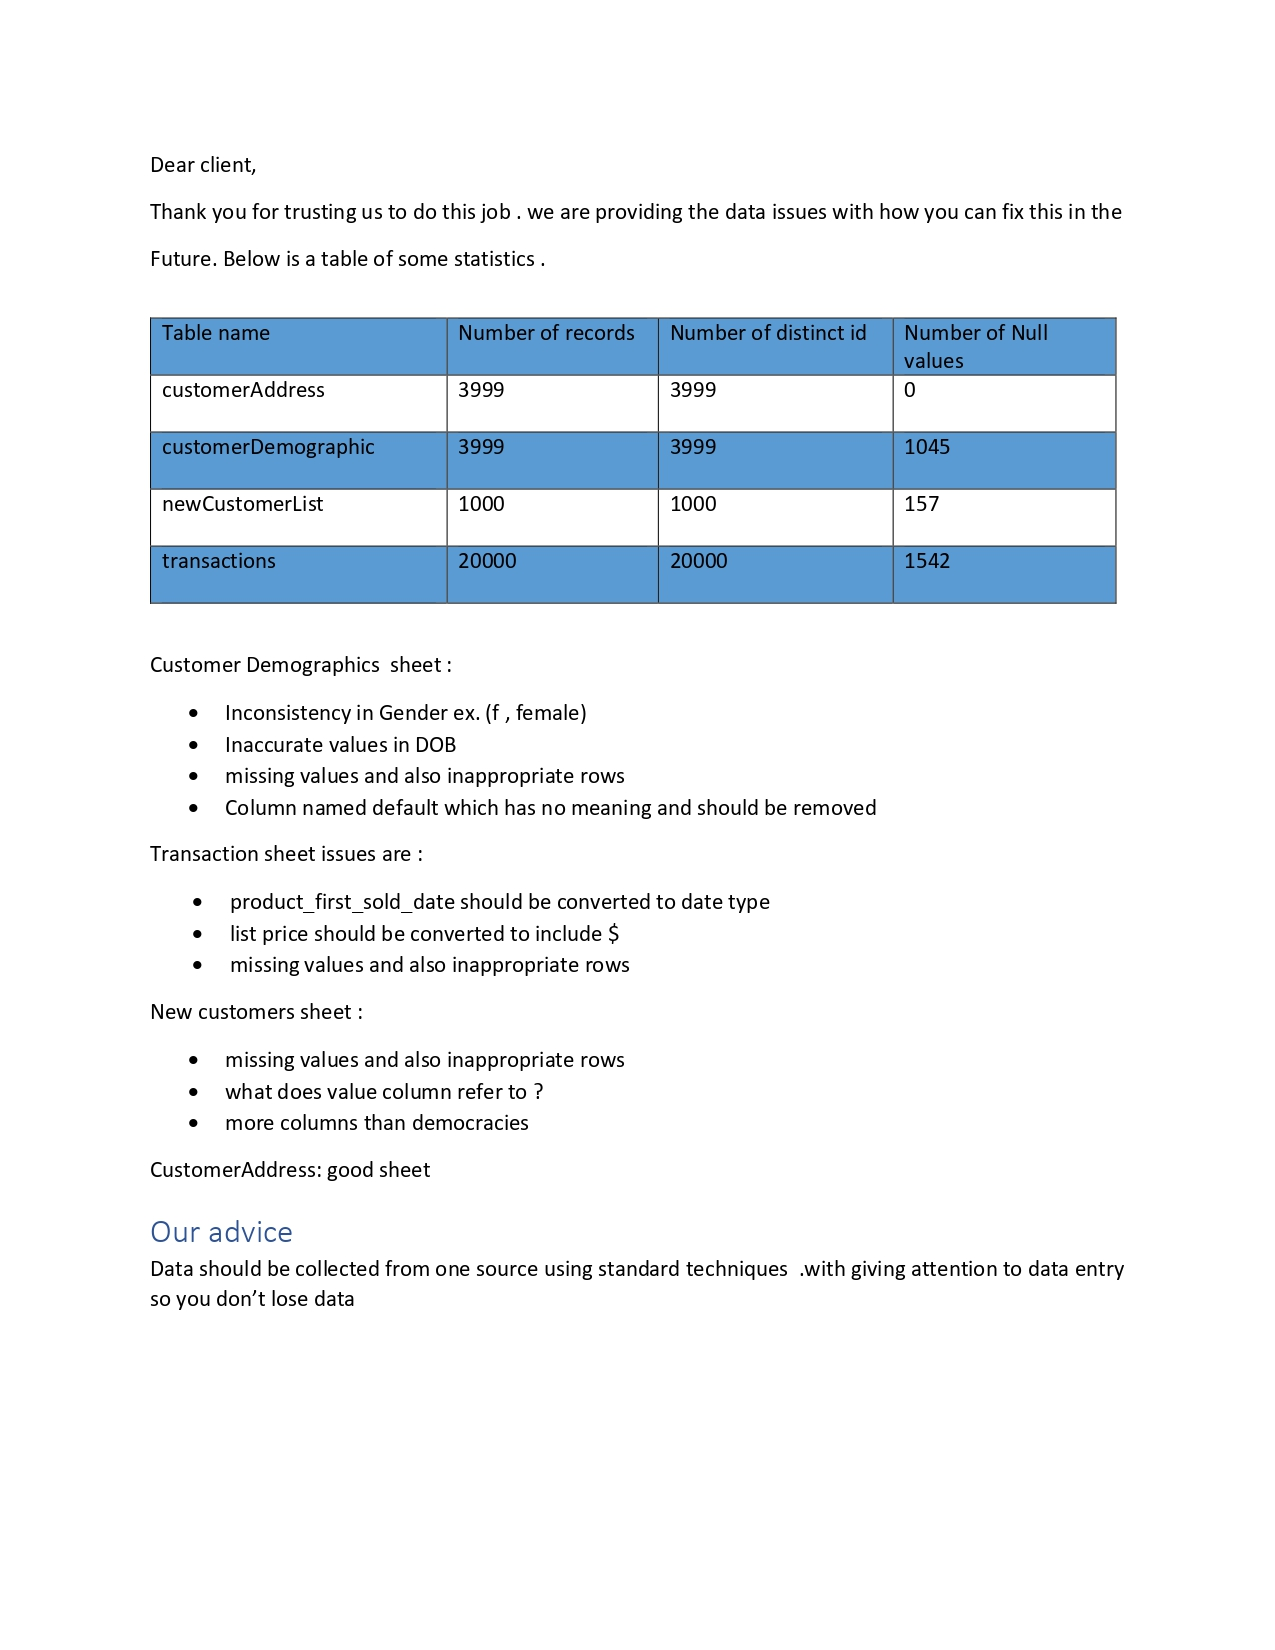